### Import models 

In [132]:
import torch
from torch.autograd import Variable
import torchvision
import torchvision.transforms as T
import matplotlib.pyplot as plt
import numpy as np
import torchvision.models as models
import PIL
import json

### Load pretrained resnet model 

In [133]:
resnet = models.resnet18(pretrained=True)
resnet = resnet.eval()

### Load input image 

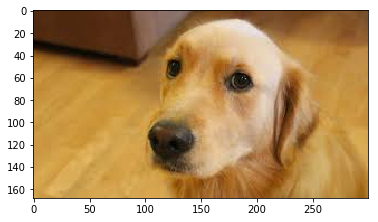

In [134]:
img = PIL.Image.open('dog.jpeg')
plt.imshow(img)
plt.show()

### Preprocess input 

In [135]:
def preprocess(img, size=(256,256)):
    transform = T.Compose([
        T.Scale(size),
        T.ToTensor(),
        T.Normalize(mean=[0.485, 0.456, 0.406],
                    std=[0.229, 0.224, 0.225]),
        T.Lambda(lambda x: x[None]),
    ])
    return transform(img)

In [136]:
pre_img = preprocess(img)

### Forward pass resnet model 

In [137]:
output = resnet(Variable(pre_img))

### Extract maximum score 

In [138]:
predictions , lbl  = output.max(1)

### Json file containing label images 

In [139]:
with open('imagenet_class_index.json') as json_data:
    lbl_names = json.load(json_data)


### Show prediction result 

In [140]:
lbl_names[str(lbl.data[0])][1]

'golden_retriever'